<a href="https://colab.research.google.com/github/AgiAgustianDavi/traffic-signs-classification/blob/main/model/model_training_traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import cv2
from PIL import Image

from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", dataset_path)

100%|██████████| 612M/612M [00:28<00:00, 22.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [3]:
data = []
labels = []
classes = 43
base_path = os.path.join(dataset_path, 'train')

for i in range(classes):
  path = os.path.join(base_path, str(i))
  images = os.listdir(path)

  for a in images:
    try:
      image = Image.open(path + '/' + a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print("Error loading image:", os.path.join(path, a))

data = np.array(data)
labels = np.array(labels)


In [15]:
import json

class_names = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
    'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
    'Speed limit (120km/h)', 'No overtaking', 'No overtaking vehicles over 3.5 metric tons',
    'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles',
    'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
    'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
    'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow',
    'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead',
    'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory',
    'End of no passing', 'No passing for vehicles over 3.5 metric tons'
]
# Buat dictionary label
class_labels = {i: class_names[i] for i in range(classes)}

# Simpan ke file JSON
with open("class_labels_fix.json", "w") as f:
    json.dump(class_labels, f)

print("class_labels_fix.json berhasil dibuat!")


class_labels_fix.json berhasil dibuat!


In [4]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [9]:
# Training the Model
epochs = 35
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.4354 - loss: 3.2062 - val_accuracy: 0.9631 - val_loss: 0.1518
Epoch 2/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9437 - loss: 0.2202 - val_accuracy: 0.9546 - val_loss: 0.1795
Epoch 3/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9486 - loss: 0.2100 - val_accuracy: 0.9858 - val_loss: 0.0589
Epoch 4/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9791 - loss: 0.0867 - val_accuracy: 0.9887 - val_loss: 0.0454
Epoch 5/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9827 - loss: 0.0635 - val_accuracy: 0.9926 - val_loss: 0.0321
Epoch 6/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9861 - loss: 0.0568 - val_accuracy: 0.9931 - val_loss: 0.0263
Epoch 7/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9846 - loss: 0.0607 - val_accuracy: 0.9909 - val_loss: 0.0368
Epoch 8/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9869 - loss: 0.0515 - val_acc

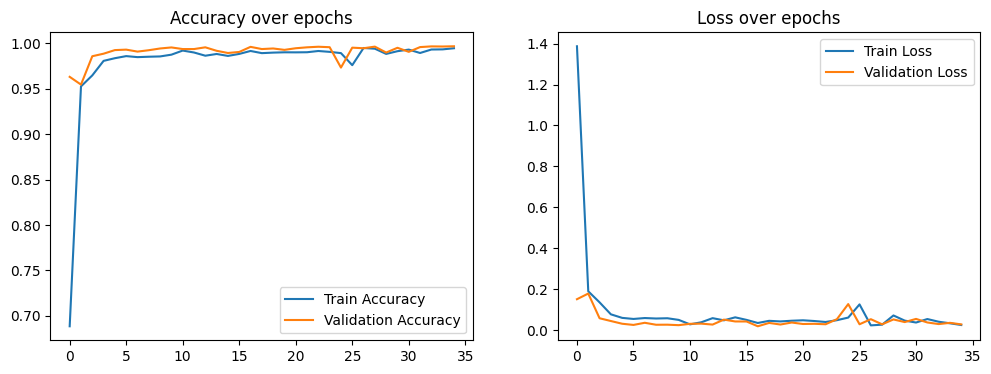

In [10]:
# 4. Plot Training History
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

In [11]:
test_csv_path = os.path.join(dataset_path, "Test.csv")

y_test_df = pd.read_csv(test_csv_path)

labels = y_test_df["ClassId"].values
imgs = y_test_df["Path"].values

data = []

for img in imgs:
    img_path = os.path.join(dataset_path, img)
    try:
        image = Image.open(img_path)
        image = image.resize((30, 30))
        data.append(np.array(image))
    except Exception as e:
        print("Error loading image:", img_path, "Error:", e)

# Convert list to numpy array
X_test = np.array(data)

print("Test dataset loaded successfully! Shape:", X_test.shape)


Test dataset loaded successfully! Shape: (12630, 30, 30, 3)


In [12]:
# Prediksi menggunakan model
pred = np.argmax(model.predict(X_test), axis=-1)

# Menghitung akurasi
accuracy = accuracy_score(labels, pred)
print(f"Test Accuracy: {accuracy:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Accuracy: 0.9718


In [13]:
# 5. Save Model
model.save("traffic_sign_model.h5")

resource: https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-97-cnn#3.-Loading-Dataset-(Traffic-Signs-Images)
